### Regular way of performing Time intervals

#### Daily, Weekly, Monthly, yearly, quarterly (Seasonailty)

Sales Forecasting

First we need to define what is sales, what do we call a confirmed Sale.

Reason for Sale ,  But the Growth rate is important, or the reason is important to use that information

More an  More Information make us tak emore informed DEcision

Components of the decompsition, 

Trend

Seasonal Component

Random or Irregular Spike, 

DEcision of Error term, depends on sccale.

### Additive 

or 

### Multipicative

In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar as cs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from io import StringIO
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import itertools



import math
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

In [457]:
### Tractor Sales data
data = pd.read_csv('data/Tractor-Sales.csv')

In [459]:
data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [336]:
data.dtypes

Month-Year                object
Number of Tractor Sold     int64
dtype: object

In [337]:
data['Month-Year'].unique()

array(['Jan-03', 'Feb-03', 'Mar-03', 'Apr-03', 'May-03', 'Jun-03',
       'Jul-03', 'Aug-03', 'Sep-03', 'Oct-03', 'Nov-03', 'Dec-03',
       'Jan-04', 'Feb-04', 'Mar-04', 'Apr-04', 'May-04', 'Jun-04',
       'Jul-04', 'Aug-04', 'Sep-04', 'Oct-04', 'Nov-04', 'Dec-04',
       'Jan-05', 'Feb-05', 'Mar-05', 'Apr-05', 'May-05', 'Jun-05',
       'Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-

In [460]:
"""Method to convert a object to date string , then USe calender module to seperate the YEar, month attributes"""

date = pd.date_range(start='01-01-2003' ,freq='MS' , periods=(len(data)))
data['Months'] = date.month
data['Year'] = date.year
data['Months'] = data['Months'].apply(lambda x: cs.month_abbr[x])
data.rename(columns= {"Number of Tractor Sold" : "Tractor_sales" }, inplace = True)
data.drop(['Month-Year'] , axis = 1,inplace = True)
data.set_index(date , inplace = True) 

In [461]:
data.head()

,Tractor_sales,Months,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


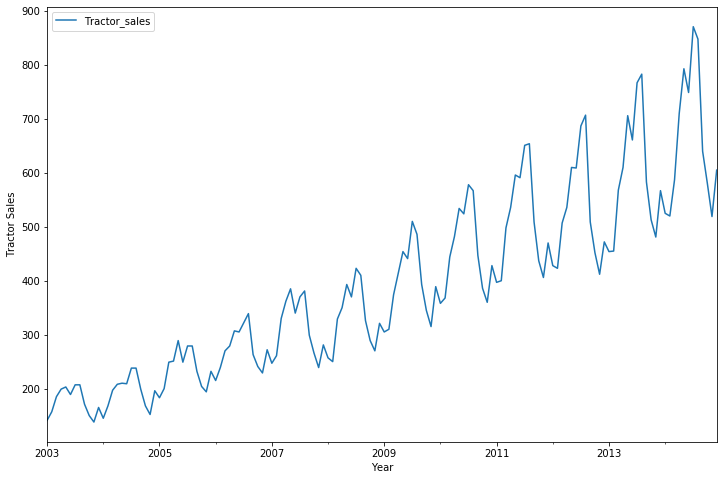

In [340]:
plt.figure(figsize=(12,8))
data['Tractor_sales'].plot()
plt.xlabel("Year")
plt.ylabel("Tractor Sales")
plt.legend()

## Trend findings

Over the Years we see an upward trend

There is definetly a Seasonality component , when we see a intra-year stable fluctuations

Also, as the trend is increasing , the Fluctuation is also increasing, meaning the error term with the total number of sales.

This shows that there is a multiplicative seasonality.



In [ ]:
## Defining the Rolling Mean and STD of the trend

In [462]:
roll_mean = data['Tractor_sales'].rolling(window = 12).mean()
roll_std = data['Tractor_sales'].rolling(window = 12).std()

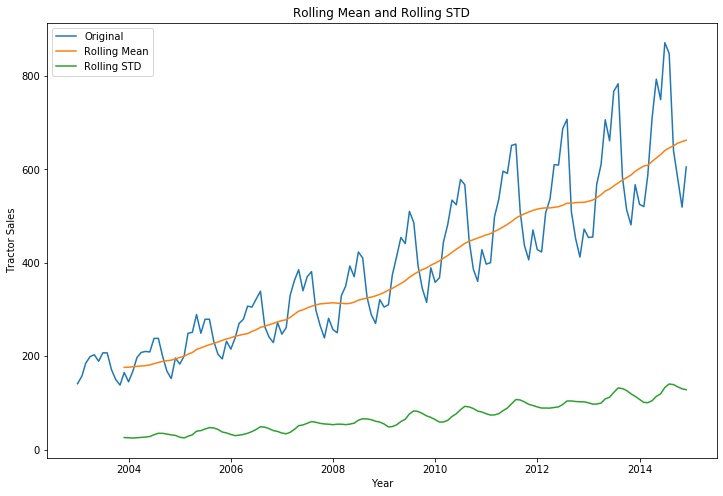

In [463]:
#Plot the rolling stats

plt.figure(figsize=(12,8))
original = plt.plot(data['Tractor_sales'] , label = "Original")
Roll_Mean = plt.plot(roll_mean , label = "Rolling Mean")
Roll_Std = plt.plot(roll_std , label = "Rolling STD")
plt.xlabel("Year")
plt.ylabel("Tractor Sales")
plt.title("Rolling Mean and Rolling STD")
plt.legend(loc = "best")

## Now lets tcreate the Monthly basis PIVOT

Year    2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014
Months                                                                        
Jan      141   145   183   215   247   257   305   358   397   428   454   525
Feb      157   168   200   239   261   250   310   368   400   423   455   520
Mar      185   197   249   270   330   329   374   444   498   507   568   587
Apr      199   208   251   279   362   350   414   482   536   536   610   710
May      203   210   289   307   385   393   454   534   596   610   706   793
Jun      189   209   249   305   340   370   441   524   591   609   661   749
Jul      207   238   279   322   370   423   510   578   651   687   767   871
Aug      207   238   279   339   381   410   486   567   654   707   783   848
Sep      171   199   232   263   299   326   393   447   509   509   583   640
Oct      150   168   204   241   266   289   345   386   437   452   513   581
Nov      138   152   194   229   239   270   315   3

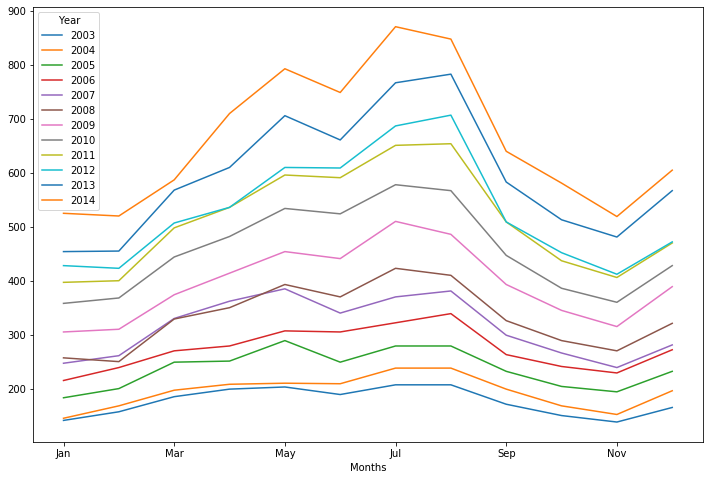

In [464]:

monthly_sale = data.pivot_table(values = 'Tractor_sales' , columns='Year' , index= 'Months' )
monthly_sale =  monthly_sale.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
print(monthly_sale)
monthly_sale.plot(figsize = (12,8))

Months  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Year                                                              
2003    141  157  185  199  203  189  207  207  171  150  138  165
2004    145  168  197  208  210  209  238  238  199  168  152  196
2005    183  200  249  251  289  249  279  279  232  204  194  232
2006    215  239  270  279  307  305  322  339  263  241  229  272
2007    247  261  330  362  385  340  370  381  299  266  239  281
2008    257  250  329  350  393  370  423  410  326  289  270  321
2009    305  310  374  414  454  441  510  486  393  345  315  389
2010    358  368  444  482  534  524  578  567  447  386  360  428
2011    397  400  498  536  596  591  651  654  509  437  406  470
2012    428  423  507  536  610  609  687  707  509  452  412  472
2013    454  455  568  610  706  661  767  783  583  513  481  567
2014    525  520  587  710  793  749  871  848  640  581  519  605


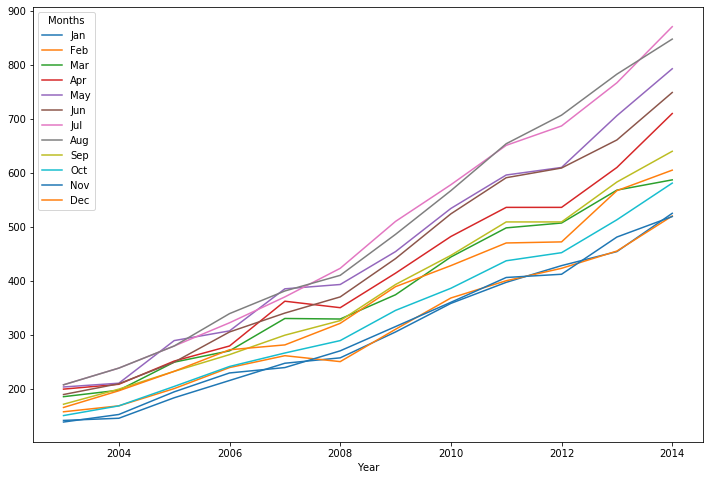

In [344]:
yearly_sale = data.pivot_table(values = 'Tractor_sales' , columns='Months' , index= 'Year' )
yearly_sale =  yearly_sale.reindex(columns=  ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
print(yearly_sale)
yearly_sale.plot(figsize = (12,8))

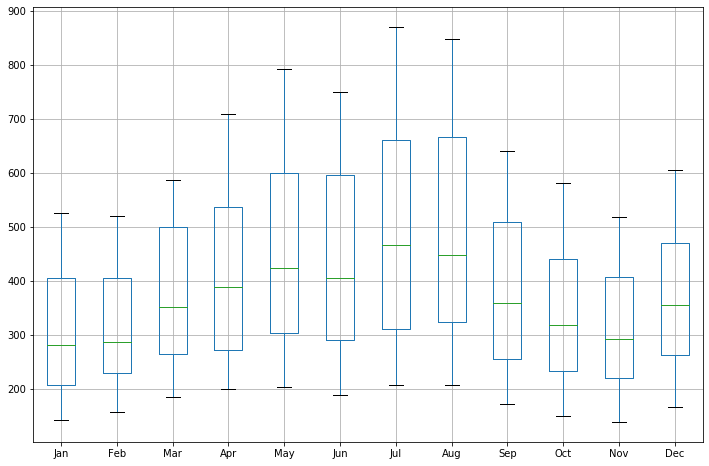

In [345]:
plt.figure(figsize = (12,8))
yearly_sale.boxplot()

In [ ]:
 ### LEts apply decomposition

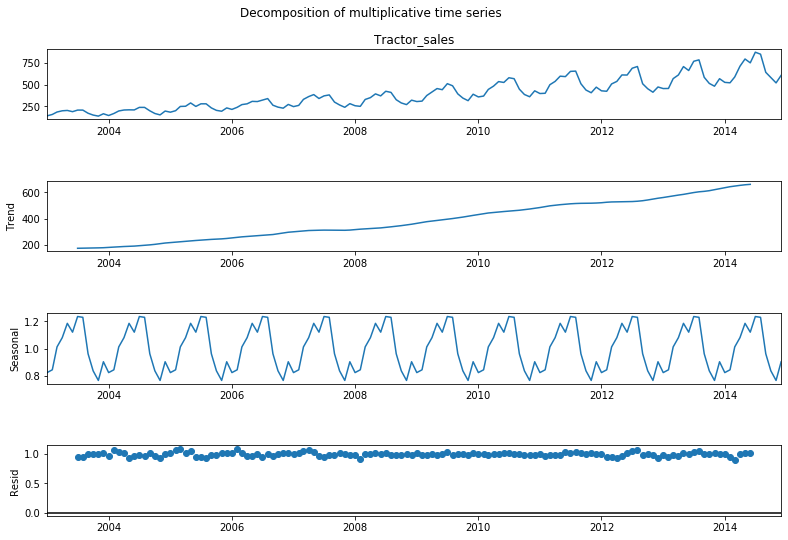

In [465]:
# plt.figure(1)
# decompose = sm.tsa.seasonal_decompose(data['Tractor_sales'] , model = "multiplicative")
# decompose.plot()
# plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose
series = data['Tractor_sales']
result = seasonal_decompose(series, model='multiplicative')
fig = result.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

HEre, as you see we have a regular seasonality and the Multiplicative factor is about 1.25 and 0.75

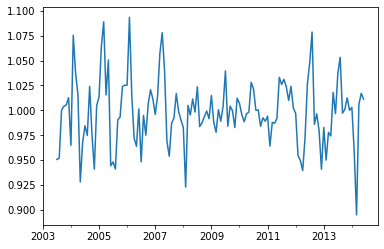

In [348]:

result.resid.plot()

This is the Error range for the Timeseries which we see arounf 0.95  to 1.00 , so almost 10% positive or Negative.

Multiply by 1 for best value, which is do nothing.

Define Your KPI well:

Like, Should we sell to have profit per unit, or sell more item for profit.

# Animal Cell Examples, little of everything is there but there is nothing like that in real world.

In [189]:
data.head()

,Tractor_sales,Months,Year
2003-01-31,141,Jan,2003
2003-02-28,157,Feb,2003
2003-03-31,185,Mar,2003
2003-04-30,199,Apr,2003
2003-05-31,203,May,2003


In [194]:


# df_train = data[data['Year'] <= 2012]
# df_test = data[data['Year'] > 2012]

In [196]:
# print(df_train.Year.max())
# print(df_test.Year.min())
# print(df_test.Year.max())

2012
2013
2014


## AUTO REGRESSIVE INTEGRATED MOVING AVERAGE  (ARIMA) or SARIMA (SEASONAL)

In [349]:
data.head()

,Tractor_sales,Months,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


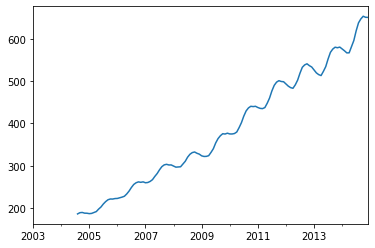

In [350]:
data['Tractor_sales'].rolling(window = 20).mean().plot()

## ARIMA MODEL

### Here are the the important ARIMA parameter that needs to be in place, Together these parameters accounts for seasoanlity, trend and Noise in Data


P == Periods taken for the Autoregressibe Model, It basially gives us an idea to learn from past and include that information to predict future. Like, if it was raining since 2-3 days, we can say it is likely to rain tomorrow as well.

d == Integrated Order , Number of Non-Seasonal Diffrences needed for Stationarity. (I) Like  we can say how warm it can be tomorrow by looking at the difference of values in the temperature of last three days.

Q == PEriods in moving Average model , No. of lag / Forecast in the prediction. (MA) The arror throughout our predictions. 



In [359]:
## DEfining the PArameters for Normal ARIMA

p = range(0,4)
d = q = range(0,2)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1)]

This is where you deinf the Seasonal ARIMA, which has additional Seasonal Component.
The term is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

In [360]:
seasonal_pdq = [(x[0],x[1],x[2] ,12) for x in pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12)]

In [361]:
## Printing the possible Combination of the Seasonal ARIM model.

print("ARIMA {} X {}".format(pdq[0] , seasonal_pdq[0]))

ARIMA (0, 0, 0) X (0, 0, 0, 12)


## Building the SARIMA MODEL (Seasonal ARIMA) and Using AIC metric to see errors .

##### https://towardsdatascience.com/the-akaike-information-criterion-c20c8fd832f2

SO, When we are trying to fit a ARIMA model , our first task is to identify the best combination of parameters to achieve the lowest arror terms.

HEre, we will use "GRID  SEARCH" to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality.

For evaluation purpose we will use AIC (Akaike Information Criterion) value , The model with the lower AIC score is expected to strike a superior balance between its ability to fit the data set and its ability to avoid over-fitting the data set.

And the AIC score is pretty useless in itself, if not compared it to other similar models. So, we will be comparing the AIC of multiple models generateed within this Grid search process 

REFER this LINK

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3#:~:text=The%20specific%20properties%20of%20time,statistical%20methods%20are%20usually%20required.&text=One%20of%20the%20methods%20available,Moving%20Averages%20with%20eXogenous%20regressors.

In [362]:
AIC = [] ## EMpty Array to Store the AIC ascore
SARIMAX_MODEL = []

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df_train,
                                             order=param,
                                             seasonal_order=seasonal_param,
                                             enforce_invertibility=False,
                                             enforce_stationarity=False)
                                             
            results = model.fit()
            AIC.append(results.aic)
            SARIMAX_MODEL.append([param, seasonal_param])
            print("SARIMA {} x {} == AIC {}".format(param , seasonal_param , results.aic))
        except:
            continue


SARIMA (0, 0, 0) x (0, 0, 0, 12) == AIC 2139.953214107524
SARIMA (0, 0, 0) x (0, 0, 1, 12) == AIC 1833.666757817984
SARIMA (0, 0, 0) x (0, 1, 0, 12) == AIC 1404.6137682050617
SARIMA (0, 0, 0) x (0, 1, 1, 12) == AIC 1239.2171555404605
SARIMA (0, 0, 0) x (1, 0, 0, 12) == AIC 1210.8743688491047
SARIMA (0, 0, 0) x (1, 0, 1, 12) == AIC 1197.5570142179513
SARIMA (0, 0, 0) x (1, 1, 0, 12) == AIC 1194.7510675583192
SARIMA (0, 0, 0) x (1, 1, 1, 12) == AIC 1117.6691839243645
SARIMA (0, 0, 0) x (2, 0, 0, 12) == AIC 1107.5414666155125
SARIMA (0, 0, 0) x (2, 0, 1, 12) == AIC 1102.9459817566333
SARIMA (0, 0, 0) x (2, 1, 0, 12) == AIC 1050.9812784934359
SARIMA (0, 0, 0) x (2, 1, 1, 12) == AIC 1009.3500434393442
SARIMA (0, 0, 0) x (3, 0, 0, 12) == AIC 998.7715998713667
SARIMA (0, 0, 0) x (3, 0, 1, 12) == AIC 991.2134611651816
SARIMA (0, 0, 0) x (3, 1, 0, 12) == AIC 934.1501831638625
SARIMA (0, 0, 0) x (3, 1, 1, 12) == AIC 895.3051456257662
SARIMA (0, 0, 1) x (0, 0, 0, 12) == AIC 1942.544640297586
SARI

In [363]:
#SMALLEST AIC
print("The smallest AIC {} for model SARIMAX {} x {}".format(min(AIC), SARIMAX_MODEL[AIC.index(min(AIC))][0],SARIMAX_MODEL[AIC.index(min(AIC))][1]))

The smallest AIC 799.9064282670552 for model SARIMAX (3, 1, 0) x (3, 1, 1, 12)


In [364]:
SARIMAX_MODEL[AIC.index(min(AIC))][0]

(3, 1, 0)

In [365]:
SARIMAX_MODEL[AIC.index(min(AIC))][1] ## Seasonal PArameter that give lowest AIC

(3, 1, 1, 12)

In [366]:
## Fit the Model with BEst PARAMETERs

model = sm.tsa.statespace.SARIMAX(df_train,
                                  order=SARIMAX_MODEL[AIC.index(min(AIC))][0],
                                  seasonal_order= SARIMAX_MODEL[AIC.index(min(AIC))][1],
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()

In [367]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                        Tractor_sales   No. Observations:                  144
Model:             SARIMAX(3, 1, 0)x(3, 1, [1], 12)   Log Likelihood                -391.953
Date:                              Mon, 21 Sep 2020   AIC                            799.906
Time:                                      15:07:37   BIC                            820.081
Sample:                                  01-01-2003   HQIC                           808.049
                                       - 12-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5417      0.098     -5.542      0.000      -0.733      -0.350
ar.L2         -0.20

WE will focus on the coef metric here, this represents the weight (IMPORTANCE FEATURE) , as how much it impacts the given Timeseries

P-value, is our another metric ofg interest as you know it gives us the Singificant Variables.

# Diagnostic PLOT

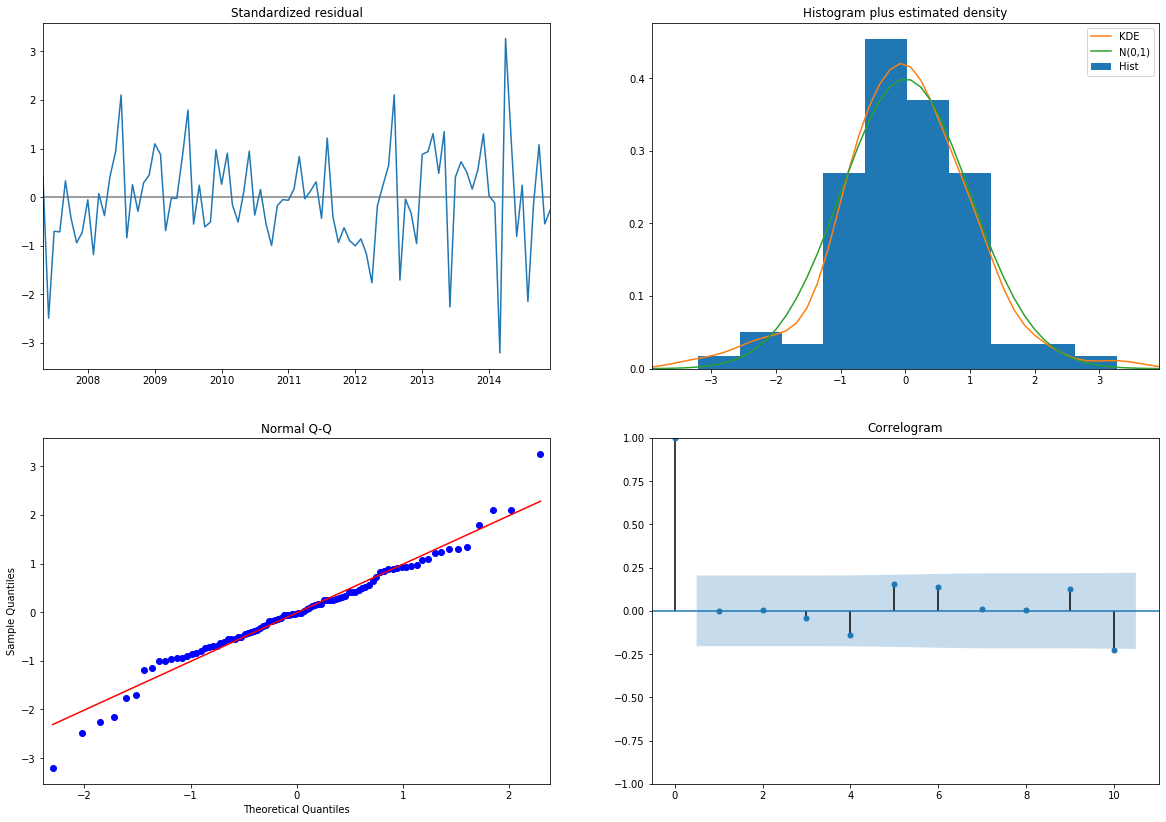

In [368]:
"""The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior."""

results.plot_diagnostics(figsize=(20, 14))
plt.show()

SO we have four different Graphs in the above plot.

1. Standard REsidual
2. DEnsity Plot
3. Normal Q-Q Plot
4. Correlogram or Auto-correlation

Our main Intution is to observe the value of Standard Residual.
If the values is un-correlated and normally distributed with Zero - mean value, that means our model is doing well...we have less noise.

If the seasonal ARIMA does not show this result, that means there is still a lot of scope to improve the produced model.

# LEts Predict

In [453]:
## PReict on the same data, so see how it performs on the Seen data.

"""The get_prediction() and conf_int() attributes allow us to obtain the values and associated
confidence intervals for forecasts of the time series."""

pred0 = results.get_prediction(start = "2003-01-01", dynamic=False)
pred0_ci = pred0.conf_int()

In [327]:
data.head()

,Tractor_sales,Months,Year
2003-01-31,141,Jan,2003
2003-02-28,157,Feb,2003
2003-03-31,185,Mar,2003
2003-04-30,199,Apr,2003
2003-05-31,203,May,2003


In [454]:
#In this case the model is asked to predict data it has not seen before.
pred2 = results.get_forecast('2016-01-01')
# Give the end year till you want forecast
pred2_ci = pred2.conf_int()

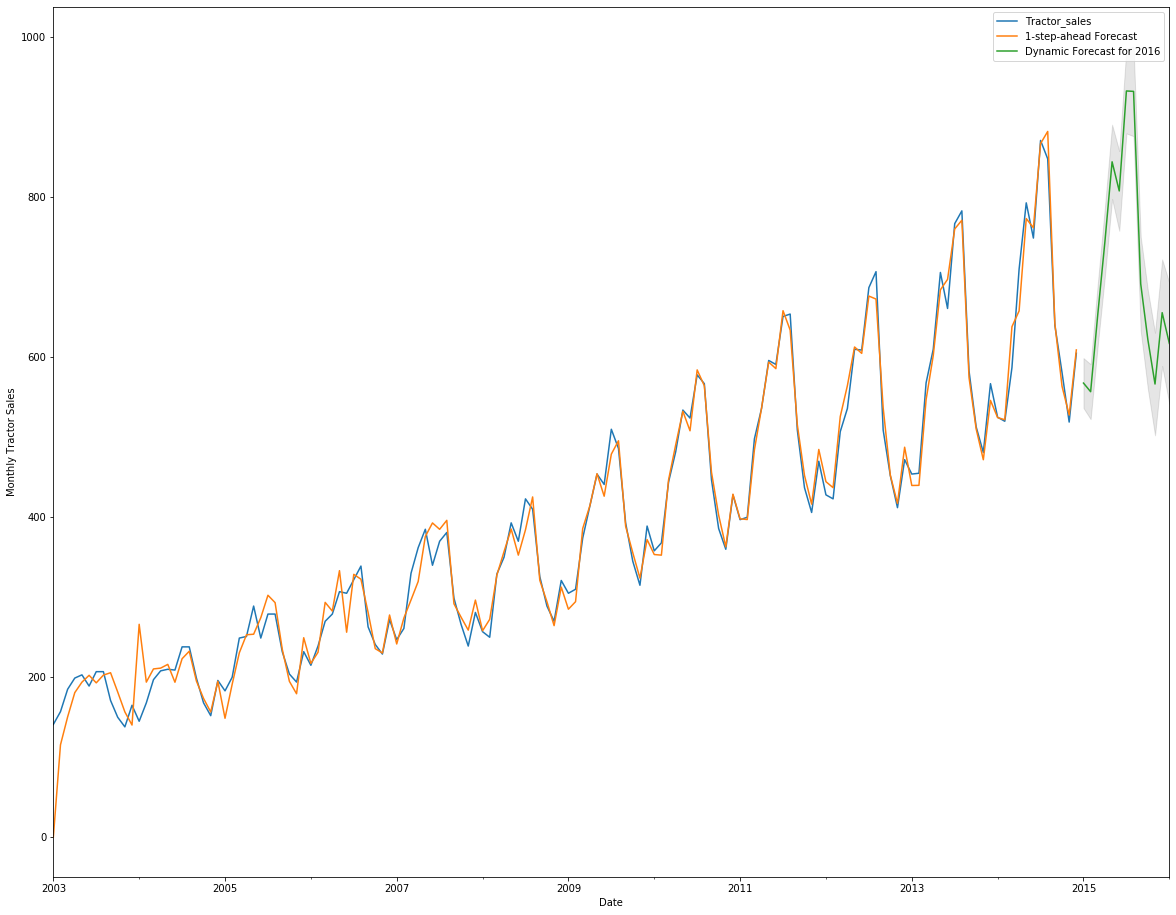

In [455]:
#Plot the predicted values
ax = df_train.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast')
# pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast for 2016')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly Tractor Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

In [377]:
pred2_ci.head()

,lower Tractor_sales,upper Tractor_sales
2015-01-01,536.514077,598.976753
2015-02-01,522.616479,591.270509
2015-03-01,615.317273,692.030008
2015-04-01,701.791441,787.941251
2015-05-01,797.905315,890.760522


In [ ]:
a